In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('x.csv')
data.head()

,Threshold,TP,FN,FP,TN,Correct,Incorrect,Test set
0,1,20,80,2,98,100,100,200
1,5,50,50,5,95,100,100,200
2,10,60,40,10,90,100,100,200
3,15,80,20,20,80,100,100,200
4,20,88,12,30,70,100,100,200


In [13]:
data['precision'] = data['TP']/(data['TP'] + data['FP'])
data['recall'] = data['TP'] / (data['TP'] + data['FN'])
df1 = data[['Threshold','TPR','FPR', 'FNR']]
df1

,Threshold,TPR,FPR,FNR
0,1,0.20,0.02,0.80
1,5,0.50,0.05,0.50
2,10,0.60,0.10,0.40
3,15,0.80,0.20,0.20
4,20,0.88,0.30,0.12
5,25,0.90,0.40,0.10
6,30,0.95,0.50,0.05
7,35,0.96,0.60,0.04
8,40,0.97,0.70,0.03
9,50,0.98,0.80,0.02


In [5]:
data['F1_Measure'] = 2 * (data['precision']*data['recall'] / (data['precision'] + data['recall']))
data['TPR'] = data['recall']
data['FPR'] = (data['FP'] / (data['TN'] + data['FP']))
data.to_csv('out.csv', index=False)

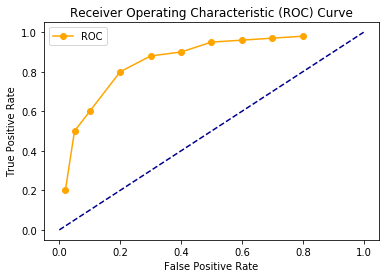

0.663


In [10]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC', marker = 'o')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(data['FPR'], data['TPR'])
import sklearn.metrics as metrics
roc_auc = metrics.auc(data['FPR'], data['TPR'])
print(roc_auc)

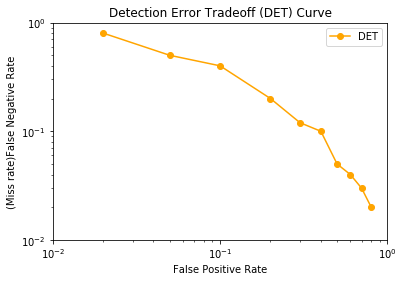

In [18]:
import matplotlib
def plot_det_curve(fpr, tpr):
    fig, ax = plt.subplots()
    plt.plot(fpr, tpr, color='orange', label='DET', marker = 'o')
    plt.xlabel('False Positive Rate')
    plt.ylabel('(Miss rate)False Negative Rate')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Detection Error Tradeoff (DET) Curve')
    plt.legend()
    #plt.show()
    ax.set_xticks([0.01, 0.1, 1])
    ax.set_yticks([0.01, 0.1, 1])

data['FNR'] = 1 - data['TPR']
#DETCurve(data['FPR'], data['FNR'])
plot_det_curve(data['FPR'], data['FNR'])